## Monte Carlo Simulation

It is a probabilistic numerical technique used to estimate the outcome of a given, uncertain process. This means that it is a method for simulating events that cannot be modelled implicitly. Now the idea is that, because stock prices follow a **random walk**(unpredictable movement), they can be simulated using Monte Carlo Simulation.



### Now, let's try to simulate Google's stock price.

In [ ]:
#imports
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

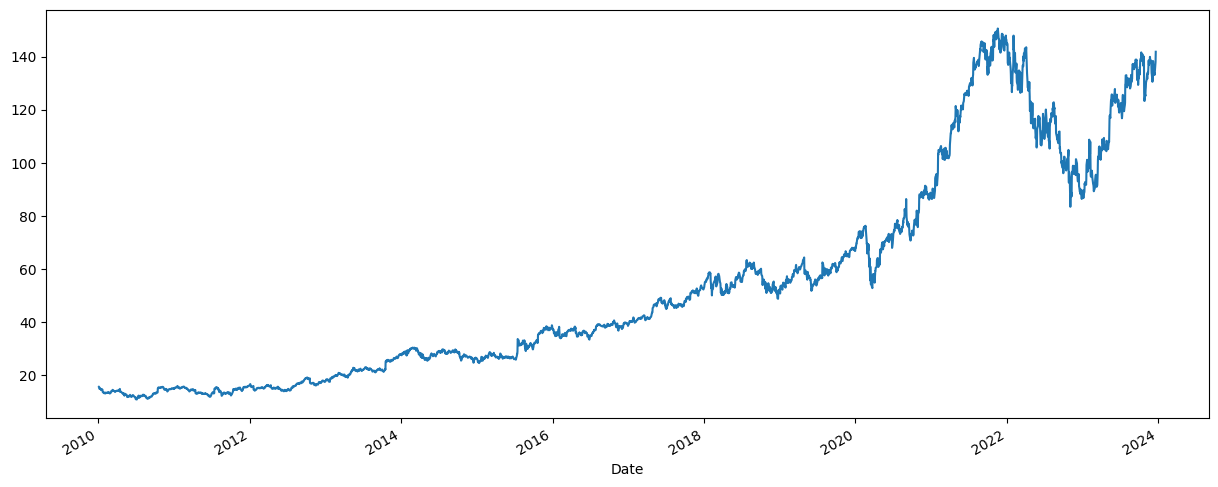

In [ ]:
ticker = 'GOOG'
data = pd.DataFrame()
data = yf.download(ticker, start='2010-01-01')
#Plot
data['Adj Close'].plot(figsize=(15,6))

In [286]:
print(data.size)
last_date = data.index[-1].strftime('%Y-%m-%d')
print(last_date)

21096
2023-12-20


<small>We will create two variables: data_2022_2023 and data_for_mean. data_2022_2023 will be used for Monte Carlo simulation to predict stock prices, and we will compare the simulated prices with the actual ones. data_for_mean will be used to find the mean and standard deviation. We will use the data from 1 and a half year(approx) prior to data_2022_2023 to find the latest mean and standard deviation.</small>

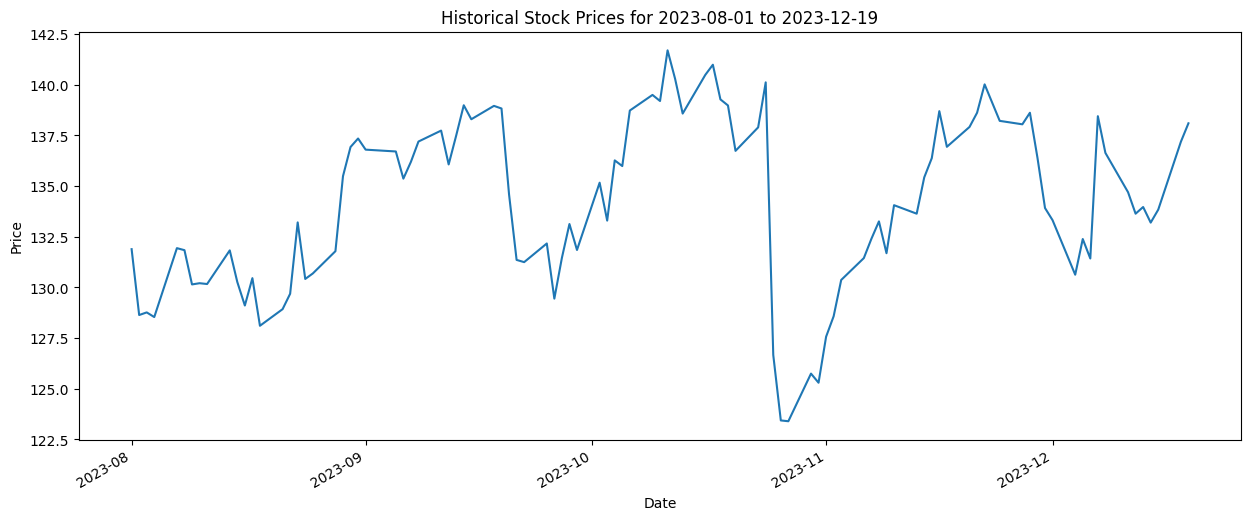

In [305]:
data_2022_2023 = data.loc['2023-08-01':'2023-12-19']
data_2022_2023['Adj Close'].plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Stock Prices for 2023-08-01 to 2023-12-19')
plt.show()

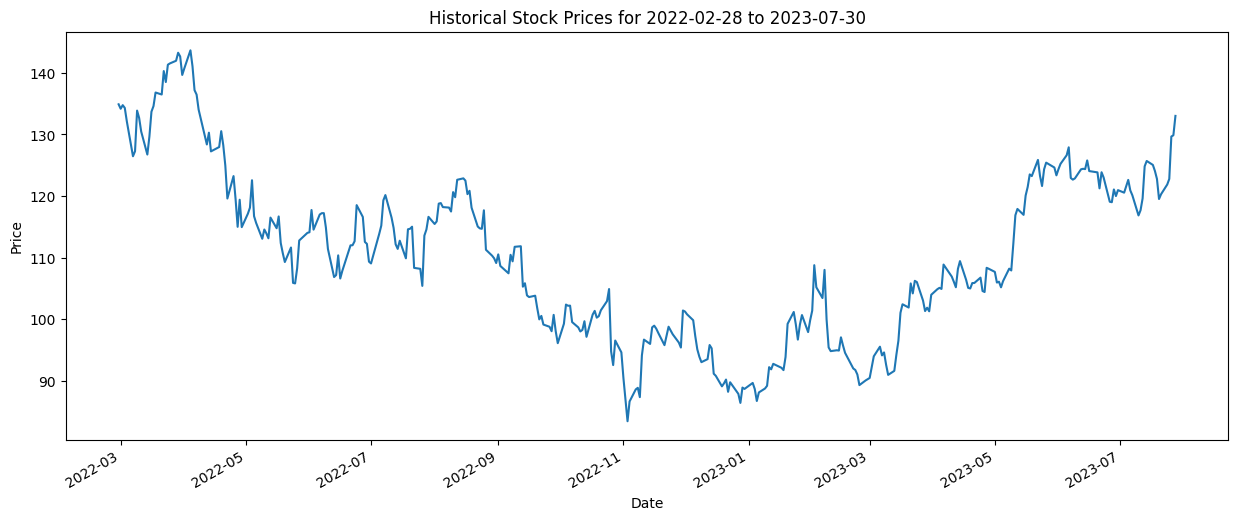

In [306]:
data_for_mean = data.loc['2022-02-28':'2023-07-30']
data_for_mean['Adj Close'].plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Stock Prices for 2022-02-28 to 2023-07-30')
plt.show()

C:\Users\MOHUL DUTTA\AppData\Local\Temp\ipykernel_10516\218010555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_r.iloc[1:])


Text(0, 0.5, 'Frequency')

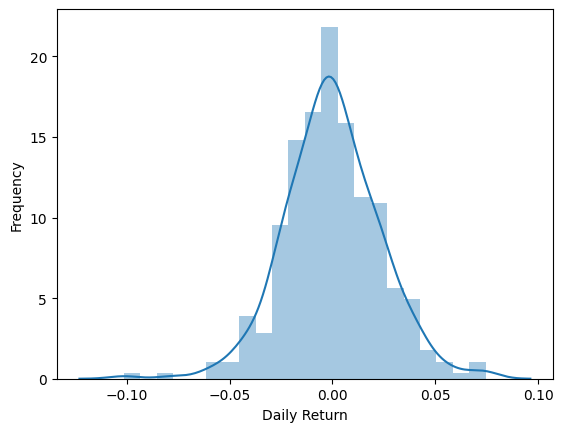

In [289]:
log_r = np.log(1 + data_for_mean['Adj Close'].pct_change())
#Plot
sns.distplot(log_r.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<small>Now we use the formula of drift as defined by the GBM model where meu is the mean of logarithmic returns , and var is the variance of same and drift =meu- 0.5 *var</small>.

In [290]:
meu = log_r.mean()
var = log_r.var()
drift = meu - (0.5*var)

In [291]:
stdev = log_r.std()
days = data_2022_2023['Adj Close'].size
trials = 50
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + stdev * Z)

In [292]:
price_paths = np.ones((days,trials))
for i in range(trials):
    price_paths[0][i] = data_2022_2023['Adj Close'].iloc[0]
    for t in range(days-1):
        price_paths[t+1][i] = price_paths[t][i]*daily_returns[t][i]

In [293]:
print(price_paths[-1][:])

[122.87346304 102.58170989 174.17187249 154.0295411  174.97263802
 131.78570937  99.58206615 144.01424771 116.44576048 120.79010443
  96.2993604  135.02927879 188.62688564 133.89686632 103.79852004
 123.94209036 170.30469006 108.69330296 134.24804028 108.81254771
 121.54723407 171.38011227 221.50830746 149.34567516 127.69913643
 181.87680393 180.25406351 104.11683154 166.34879634 125.33755639
 145.26079503 173.17928109 103.62028266 124.80805209 167.39855592
 143.46528788 109.84937238  95.76899735 104.45805715 135.25850654
 127.94230469 185.9784459  160.97973796 110.33767733 154.99744997
 114.18666078 105.25657982  79.5359965  123.02931051 111.01195837]


Note that time in the x axis ,is the number of days gone after the starting date(1st august).So if time in x axis is 30 it refers to 31st August.

Measuring the Volatility with time

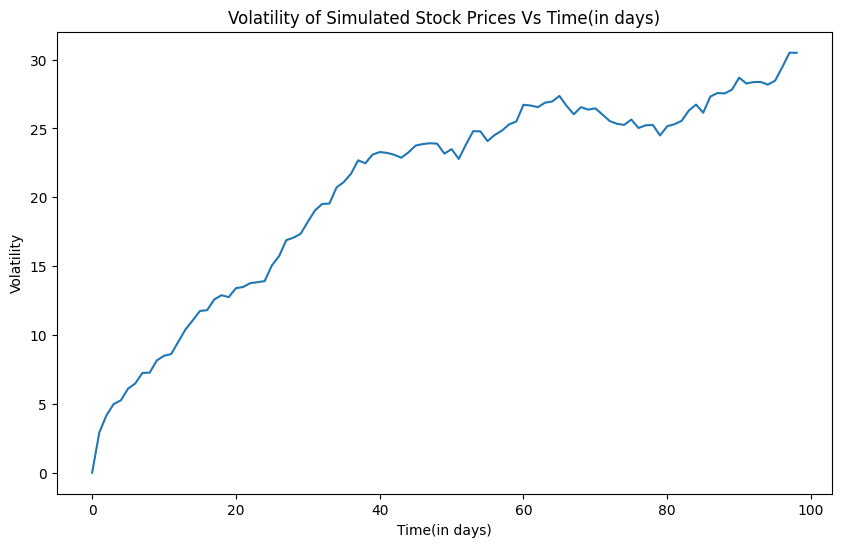

In [308]:
volatility = np.std(price_paths, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(volatility)
plt.xlabel('Time(in days)')
plt.ylabel('Volatility')
plt.title('Volatility of Simulated Stock Prices Vs Time(in days)')
plt.show()

Comparing the price paths for some trials

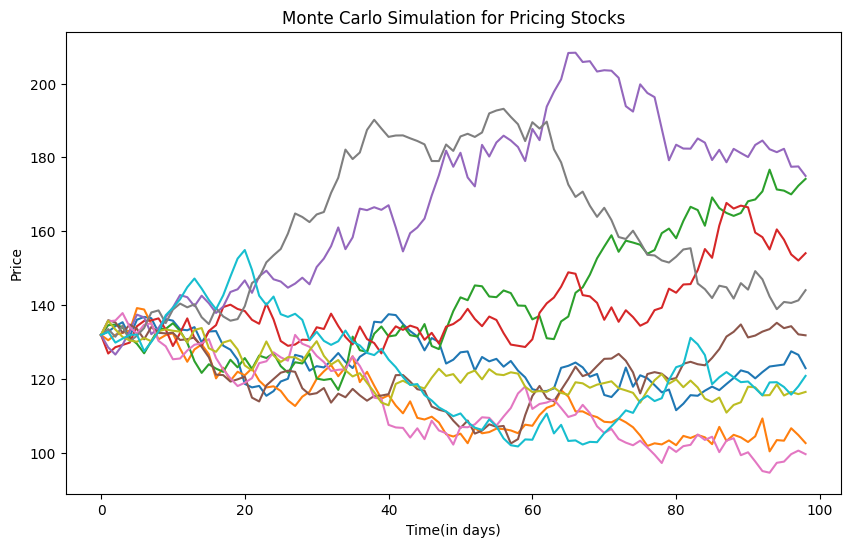

In [309]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(price_paths[:, i])
plt.xlabel('Time(in days)')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Pricing Stocks')
plt.show()

<small>The different curves above shows the different possiblities of the price variation based on randomness.
Also note that time is in days after the starting date(1st august).</small>

Plot of the distribution of stock prices 

C:\Users\MOHUL DUTTA\AppData\Local\Temp\ipykernel_10516\1238055080.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_paths[-1])


Text(0, 0.5, 'Frequency')

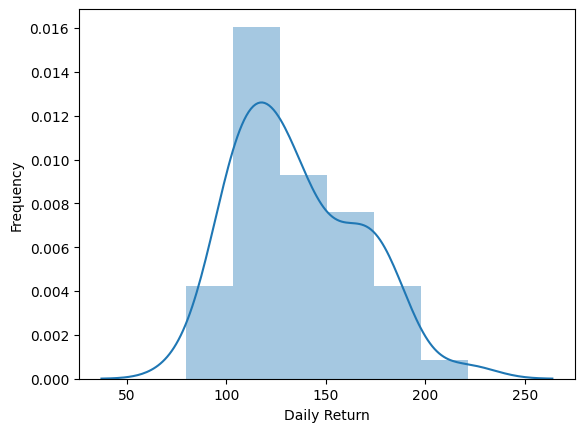

In [296]:
sns.distplot(price_paths[-1])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

Mean Simulated Price(from al the trials)

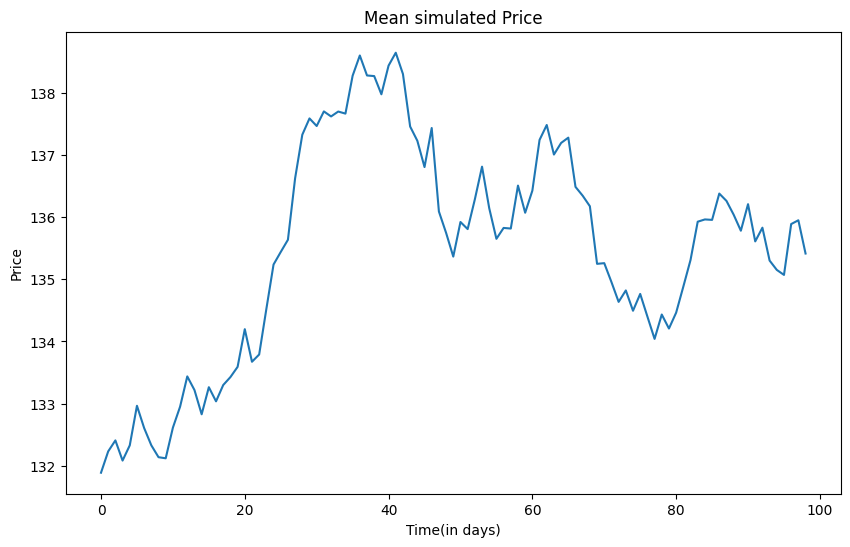

In [310]:
mean_prices = np.mean(price_paths, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(mean_prices)
plt.xlabel('Time(in days)')
plt.ylabel('Price')
plt.title('Mean simulated Price')
plt.show()

Comparing this with the orginal Stock Prices

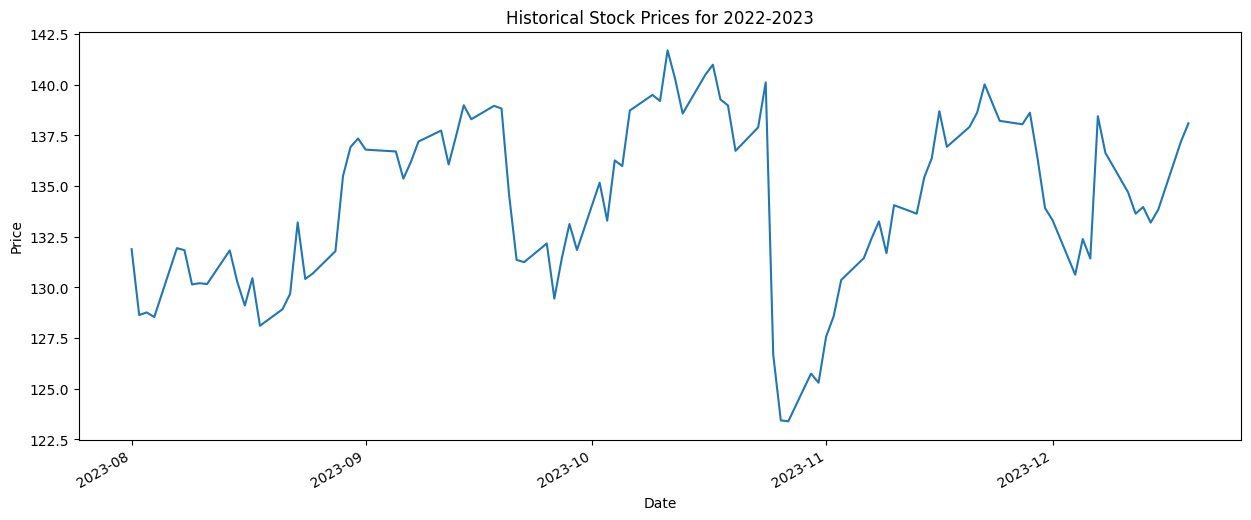

In [298]:
data_2022_2023['Adj Close'].plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Stock Prices for 2022-2023')
plt.show()

Comparing the 2 graphs showing the variation over time

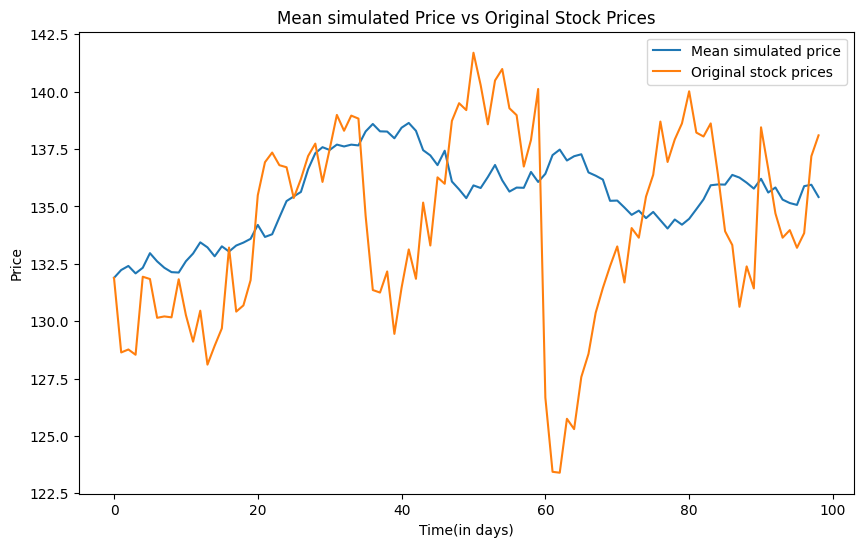

In [311]:
adj_close_list = data_2022_2023['Adj Close'].tolist()
plt.figure(figsize=(10, 6))
plt.plot(mean_prices, label='Mean simulated price')
plt.plot(adj_close_list, label='Original stock prices')
plt.xlabel('Time(in days)')
plt.ylabel('Price')
plt.title('Mean simulated Price vs Original Stock Prices')
plt.legend()
plt.show()

In [ ]:
differences = np.array(mean_prices) - np.array(adj_close_list)
rms = np.sqrt(np.mean(np.square(differences)))
print("Mean Difference =",np.mean(differences))
print("Squared average(or variation) of the 2 arrays =",rms)

Mean Difference = 1.3427253399649715
Squared average(or varaition) of the 2 arrays = 4.44408220028499


By using the mean and deviation data prior to August 2023 and focusing solely on August 1st stock price, our predictive method showcased a negligible variance from actual prices between August 1st and December 19th. This tight alignment between forecasted and real stock values underscores the robustness of our approach. Leveraging historical trends, we managed to capture the market movement, affirming the efficacy of using Monte Carlo Simulation for predictions. This validation emphasizes the reliability of our methodology in foreseeing stock price movements over this period, demonstrating the predictive power of the model built on historical data.